In [ ]:
# import the used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import QuantLib as ql
import BootStrap.BootStrapping as bs
import MarketData.MarketData as md
import  math
#import MarketData.ReadExcel 
#import openpyxl 
import re

%matplotlib inline




In [ ]:
# Setting evaluation date
today = ql.Date.todaysDate()
today = ql.TARGET().adjust(today,ql.Following)
ql.Settings.instance().setEvaluationDate(today)

In [ ]:
mc = md.MarketConventions()
mdata = md.getQuantLibMarketData()

mdata = md.getBBMarketData()
#mdata = md.getMarketData("MarketData\CurvesFromBB\EUR.OIS.xlsx",'Bcurve',['Term','InstType','InstDes','Mid','Frequency','DayCount'])


In [ ]:
for item in sorted (mdata.depoQuotes, key = lambda item : ql.Period(item.numTimeUnits,item.timeUnit)):
    print(item)
for item in sorted (mdata.oiSwapQuotes, key = lambda item : ql.Period(item.numTimeUnits,item.timeUnit)):
    print(item)



Maturity: 1D	Quoted Rate:-0.0570 %
Maturity: 1W	Quoted Rate:-0.0560 %
Maturity: 2W	Quoted Rate:-0.0560 %
Maturity: 1M	Quoted Rate:-0.0630 %
Maturity: 2M	Quoted Rate:-0.0730 %
Maturity: 3M	Quoted Rate:-0.0810 %
Maturity: 4M	Quoted Rate:-0.0870 %
Maturity: 5M	Quoted Rate:-0.0930 %
Maturity: 6M	Quoted Rate:-0.1000 %
Maturity: 7M	Quoted Rate:-0.1040 %
Maturity: 8M	Quoted Rate:-0.1080 %
Maturity: 9M	Quoted Rate:-0.1110 %
Maturity: 10M	Quoted Rate:-0.1140 %
Maturity: 11M	Quoted Rate:-0.1150 %
Maturity: 12M	Quoted Rate:-0.1190 %
Maturity: 18M	Quoted Rate:-0.1300 %
Maturity: 2Y	Quoted Rate:-0.1320 %
Maturity: 3Y	Quoted Rate:-0.1030 %
Maturity: 4Y	Quoted Rate:-0.0570 %
Maturity: 5Y	Quoted Rate:-0.0020 %
Maturity: 6Y	Quoted Rate:0.0530 %
Maturity: 7Y	Quoted Rate:0.1100 %
Maturity: 8Y	Quoted Rate:0.1710 %
Maturity: 9Y	Quoted Rate:0.2260 %
Maturity: 10Y	Quoted Rate:0.2780 %
Maturity: 11Y	Quoted Rate:0.3070 %
Maturity: 12Y	Quoted Rate:0.3740 %
Maturity: 15Y	Quoted Rate:0.4850 %
Maturity: 20Y	Quoted

In [81]:
       
oisZeroYields = bs.BootstrapOIS(mdata,mc)
   


In [97]:
discountTermStructure = ql.RelinkableYieldTermStructureHandle()
discountTermStructure.linkTo(oisZeroYields)
forecastTermStructure = ql.RelinkableYieldTermStructureHandle()
forecastTermStructure.linkTo(oisZeroYields)
# swaps to be priced

swapEngine = ql.DiscountingSwapEngine(discountTermStructure)
def priceOISwap(numTermUnits,termUnit,index,mc):
    nominal = 1000000
    settlementDate = mc.calendar.advance(ql.Settings.instance().evaluationDate,mc.settlementDays,
                                        ql.Days,mc.floatingEoniaConvention)
    maturity = mc.calendar.advance(settlementDate,numTermUnits,termUnit,mc.fixedEoniaConvention)
    
  
    fixedLegAdjustment = mc.fixedEoniaConvention
    fixedLegDayCounter = mc.fixedEoniaDayCount
    fixedLegTenor = ql.Period(1,ql.Years)
    fixedRate = 0.0
  
    spread = 0.0    
    floatingLegAdjustment = mc.floatingEoniaConvention
    floatingLegDayCounter = mc.floatingEoniaDayCount
    floatingLegTenor = ql.Period(1,ql.Years)
   
    fixedSchedule = ql.Schedule(settlementDate, maturity,
                             fixedLegTenor, mc.calendar,
                             fixedLegAdjustment, fixedLegAdjustment,
                             ql.DateGeneration.Forward, False)
    floatingSchedule = ql.Schedule(settlementDate, maturity,
                                floatingLegTenor, mc.calendar,
                                floatingLegAdjustment, floatingLegAdjustment,
                                ql.DateGeneration.Forward, False)

    spot = ql.VanillaSwap(ql.VanillaSwap.Payer, nominal,
                       fixedSchedule, fixedRate, fixedLegDayCounter,
                       floatingSchedule, index, spread,
                       floatingLegDayCounter)
    spot.setPricingEngine(swapEngine)
    return spot.NPV(),spot.fairRate(),spot.fairSpread()




In [106]:
oindex = ql.Eonia(forecastTermStructure)


In [107]:
for item in sorted (mdata.oiSwapQuotes, key = lambda item : ql.Period(item.numTimeUnits,item.timeUnit)):
    print("Market: " + md.printOISwapDatum(item,4)
    + ";Model: " + md.formatRate(priceOISwap(item.numTimeUnits,item.timeUnit,oindex,mc)[1],4)
    + ";Error: " + md.formatRate(item.rate-priceOISwap(item.numTimeUnits,item.timeUnit,oindex,mc)[1],4))
    
    


 


  

Market: Maturity: 1W	Quoted Rate:-0.0560 %;Model: -0.0560 %;Error: -0.0000 %
Market: Maturity: 2W	Quoted Rate:-0.0560 %;Model: -0.0560 %;Error: -0.0000 %
Market: Maturity: 1M	Quoted Rate:-0.0630 %;Model: -0.0630 %;Error: 0.0000 %
Market: Maturity: 2M	Quoted Rate:-0.0730 %;Model: -0.0730 %;Error: -0.0000 %
Market: Maturity: 3M	Quoted Rate:-0.0810 %;Model: -0.0810 %;Error: -0.0000 %
Market: Maturity: 4M	Quoted Rate:-0.0870 %;Model: -0.0870 %;Error: -0.0000 %
Market: Maturity: 5M	Quoted Rate:-0.0930 %;Model: -0.0930 %;Error: 0.0000 %
Market: Maturity: 6M	Quoted Rate:-0.1000 %;Model: -0.1000 %;Error: 0.0000 %
Market: Maturity: 7M	Quoted Rate:-0.1040 %;Model: -0.1040 %;Error: -0.0000 %
Market: Maturity: 8M	Quoted Rate:-0.1080 %;Model: -0.1080 %;Error: 0.0000 %
Market: Maturity: 9M	Quoted Rate:-0.1110 %;Model: -0.1110 %;Error: -0.0000 %
Market: Maturity: 10M	Quoted Rate:-0.1140 %;Model: -0.1140 %;Error: 0.0000 %
Market: Maturity: 11M	Quoted Rate:-0.1150 %;Model: -0.1150 %;Error: -0.0000 %
Ma

C:\Users\fhoefer\AppData\Local\Temp\ipykernel_23548\1358837875.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(yearFracs, [item.rate for item in mdata.oiSwapQuotes],'k--', label='OISwap Market Par Rate', color ='green')
C:\Users\fhoefer\AppData\Local\Temp\ipykernel_23548\1358837875.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(yearFracs, [priceOISwap(item.numTimeUnits,item.timeUnit,oindex,mc)[1] for item in mdata.oiSwapQuotes],'k', label='OISwap Model Par Rate',color ='red')
C:\Users\fhoefer\AppData\Local\Temp\ipykernel_23548\1358837875.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(

Text(0.5, 1.0, ' ')

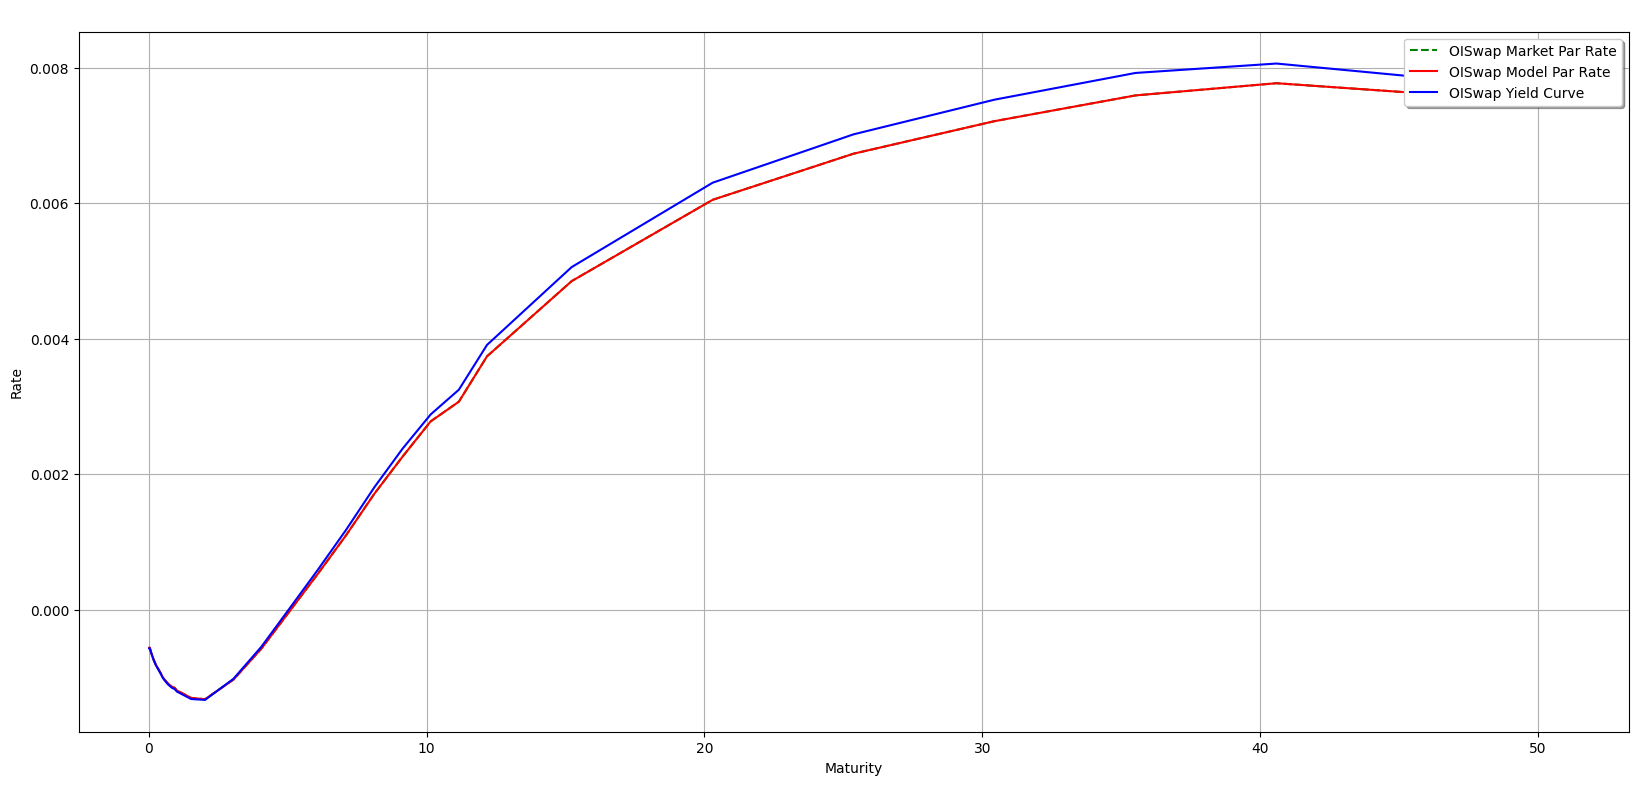

In [110]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(211)
ax.grid(True)

yearFracs = [ql.Actual360().yearFraction(today,mat) 
             for mat in [ ql.TARGET().adjust(today + x, ql.Following) 
             for x in [ql.Period(item.numTimeUnits,item.timeUnit) 
             for item in mdata.oiSwapQuotes]]]

ax.plot(yearFracs, [item.rate for item in mdata.oiSwapQuotes],'k--', label='OISwap Market Par Rate', color ='green')
ax.plot(yearFracs, [priceOISwap(item.numTimeUnits,item.timeUnit,oindex,mc)[1] for item in mdata.oiSwapQuotes],'k', label='OISwap Model Par Rate',color ='red')
ax.plot(yearFracs, [- math.log(oisZeroYields.discount(yf, True))/yf for yf in yearFracs] ,'k', label='OISwap Yield Curve',color ='blue')
ax.set_xlabel('Maturity') 
ax.set_ylabel('Rate')
legend = ax.legend(loc='upper right', shadow=True)
ax.set_title(" ", fontdict=None, loc=u'center')

In [111]:
yearFracs = [ql.Actual360().yearFraction(today,mat) 
             for mat in [ ql.TARGET().adjust(today + x, ql.Following) 
             for x in [ql.Period(item.numTimeUnits,item.timeUnit) 
             for item in mdata.oiSwapQuotes]]]


wb = openpyxl.load_workbook("MarketData\CurvesFromBB\EUR.OIS.xlsx")
ws = wb.get_sheet_by_name('BView DC (linear_s)')
bblist = MarketData.ReadExcel.get_list_from_cols(['Term','Df.Mid'],ws) 
bbzeroyield = []

for item in bblist:      
            numSettlementDays =0
            matchResult = re.match("([0-9]{1,2}) ([a-zA-Z][a-zA-Z])", item['Term'], flags=0)
            if(matchResult):
                timeUnit = md.map_BBtenor_to_quantlib(matchResult.group(2))
                numTimeUnits = int(matchResult.group(1))
                rate = item['Df.Mid']*100
                bbzeroyield.append(md.Datum(numSettlementDays,timeUnit,numTimeUnits,rate/100))
            else:
                print("Could not parse " + item['InstType'] + ' ' + 'Term' + ": " +item['Term'] )

yfData =[]
dfData=[]
error =[]
for item in sorted (mdata.oiSwapQuotes, key = lambda item : ql.Period(item.numTimeUnits,item.timeUnit)):
       term = md.printOISwapDatum(item,4)
       yf = ql.Actual360().yearFraction(today,ql.TARGET().adjust(today + ql.Period(item.numTimeUnits,item.timeUnit), ql.Following)) 
       yfData.append(yf)
       df = [bbitem.rate for bbitem in bbzeroyield if ((item.numTimeUnits == bbitem.numTimeUnits)&(item.timeUnit == bbitem.timeUnit))][0]
       dfData.append(df)
       err = df - oisZeroYields.discount(yf, True)
       error.append(err)
       print("Market: " + term + ':  ')
       print("   Discount Factor:    " + str(oisZeroYields.discount(yf, True)))       
       print("   BB Discount Factor: " + str(df))
       print("   Error: " + str(err))

<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
C:\Users\fhoefer\AppData\Local\Temp\ipykernel_23548\1500319942.py:7: SyntaxWarning: invalid escape sequence '\C'
  wb = openpyxl.load_workbook("MarketData\CurvesFromBB\EUR.OIS.xlsx")


NameError: name 'openpyxl' is not defined

Text(0.5, 1.0, ' ')

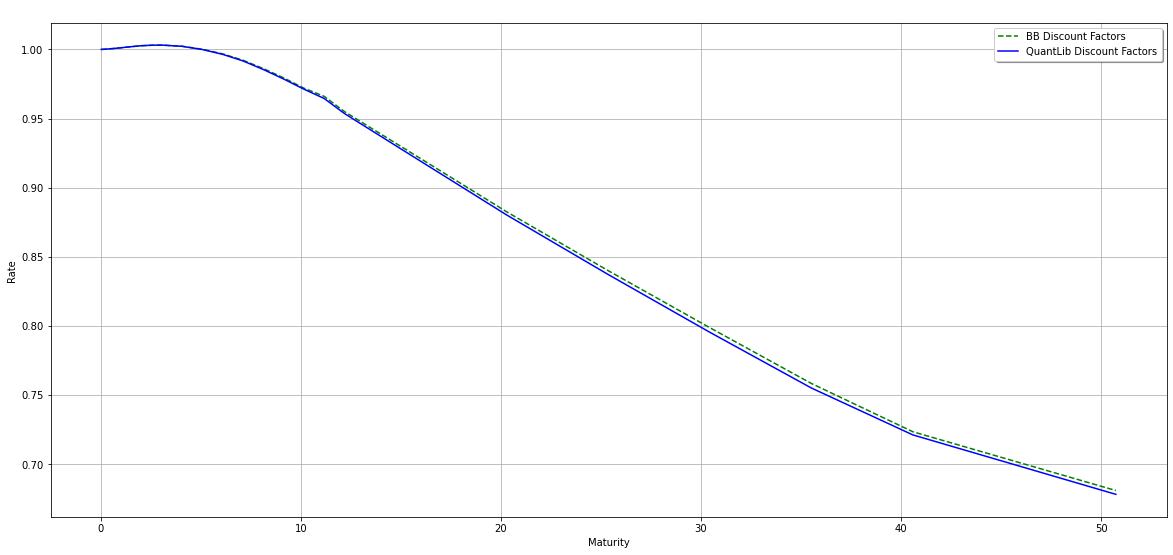

In [ ]:
fig2 = plt.figure(figsize=(20,20))
ax2 = fig2.add_subplot(211)
ax2.grid(True)

yearFracs = [ql.Actual360().yearFraction(today,mat) 
             for mat in [ ql.TARGET().adjust(today + x, ql.Following) 
             for x in [ql.Period(item.numTimeUnits,item.timeUnit) 
             for item in mdata.oiSwapQuotes]]]

ax2.plot(yearFracs, dfData,'k--', label='BB Discount Factors', color ='green')
ax2.plot(yearFracs, [oisZeroYields.discount(yf, True) for yf in yfData] ,'k', label='QuantLib Discount Factors',color ='blue')
ax2.set_xlabel('Maturity') 
ax2.set_ylabel('Rate')
legend = ax2.legend(loc='upper right', shadow=True)
ax2.set_title(" ", fontdict=None, loc=u'center')